# Assignment 2: **Machine learning with tree based models** 

In this assignment, you will work on the **Titanic** dataset and use machine learning to create a model that predicts which passengers survived the **Titanic** shipwreck. 

---
## About the dataset:
---
* The column named  `Survived` is the label and the remaining columns are features. 
* The features can be described as given below:
  <table>
  <thead>
    <tr>
      <th>Variable</th>
      <th>Definition </th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>pclass</td>
      <td>Ticket class	</td>
    </tr>
    <tr>
      <td>SibSp</td>
      <td>Number of siblings / spouses aboard the Titanic</td>
    </tr>
    <tr>
      <td>Parch</td>
      <td>Number of parents / children aboard the Titanic</td>
    </tr>
    <tr>
      <td>Ticket</td>
      <td>Ticket number</td>
    </tr>
    <tr>
      <td>Embarked</td>
      <td>Port of Embarkation: C = Cherbourg, Q = Queenstown, S = Southampton</td>
    </tr>
  </tbody>
</table> 	

---
## Instructions
---
* Apply suitable data pre-processing techniques, if needed. 
* Implement a few classifiers to create your model and compare the performance metrics by plotting the curves like roc_auc, confusion matrix, etc. 

In [0]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import seaborn as sns

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,mean_squared_error as MSE,roc_auc_score,confusion_matrix,classification_report,roc_curve 
from xgboost import XGBClassifier
import xgboost as xgb
SEED=1

In [0]:
titanic_data = pd.read_csv('https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Assignments/MachineLearning/L2/titanic.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
titanic_data.shape

(891, 12)

In [0]:
print(titanic_data.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [0]:
titanic_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [0]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [0]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [0]:
titanic_data = titanic_data.drop(['PassengerId','Name','Cabin','Ticket'], axis=1)

In [0]:
titanic_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [0]:
imp =SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(titanic_data[['Age']]) 
titanic_data['Age'] = imp.transform(titanic_data[['Age']])

In [0]:
titanic_data['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [0]:
common_value='S'
titanic_data['Embarked'] = titanic_data['Embarked'].fillna(common_value)

In [0]:
titanic_data['Sex'] = titanic_data['Sex'].apply(lambda x: 0 if x=="male" else 1)

In [0]:
titanic_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.000000,1,0,7.2500,S
1,1,1,1,38.000000,1,0,71.2833,C
2,1,3,1,26.000000,0,0,7.9250,S
3,1,1,1,35.000000,1,0,53.1000,S
4,0,3,0,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000,S
887,1,1,1,19.000000,0,0,30.0000,S
888,0,3,1,29.699118,1,2,23.4500,S
889,1,1,0,26.000000,0,0,30.0000,C


In [0]:
print(titanic_data.isna().sum())

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [0]:
ports = {"C":0,"Q":1,"S":2}
titanic_data['Embarked'] = titanic_data['Embarked'].map(ports)
titanic_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.000000,1,0,7.2500,2
1,1,1,1,38.000000,1,0,71.2833,0
2,1,3,1,26.000000,0,0,7.9250,2
3,1,1,1,35.000000,1,0,53.1000,2
4,0,3,0,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000,2
887,1,1,1,19.000000,0,0,30.0000,2
888,0,3,1,29.699118,1,2,23.4500,2
889,1,1,0,26.000000,0,0,30.0000,0


In [0]:
titanic_data['Age']=titanic_data['Age'].astype(int) 
titanic_data['Fare']=titanic_data['Fare'].astype(int) 


In [0]:
titanic_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22,1,0,7,2
1,1,1,1,38,1,0,71,0
2,1,3,1,26,0,0,7,2
3,1,1,1,35,1,0,53,2
4,0,3,0,35,0,0,8,2
...,...,...,...,...,...,...,...,...
886,0,2,0,27,0,0,13,2
887,1,1,1,19,0,0,30,2
888,0,3,1,29,1,2,23,2
889,1,1,0,26,0,0,30,0


In [0]:
pd.qcut(titanic_data['Fare'],4)

0      (-0.001, 7.0]
1      (31.0, 512.0]
2      (-0.001, 7.0]
3      (31.0, 512.0]
4        (7.0, 14.0]
           ...      
886      (7.0, 14.0]
887     (14.0, 31.0]
888     (14.0, 31.0]
889     (14.0, 31.0]
890    (-0.001, 7.0]
Name: Fare, Length: 891, dtype: category
Categories (4, interval[float64]): [(-0.001, 7.0] < (7.0, 14.0] < (14.0, 31.0] < (31.0, 512.0]]

In [0]:
    titanic_data.loc[ titanic_data['Age'] <=19, 'Age'] = 0
    titanic_data.loc[(titanic_data['Age'] > 19 )& (titanic_data['Age'] <= 25), 'Age'] = 1
    titanic_data.loc[(titanic_data['Age'] > 25) & (titanic_data['Age'] <= 29), 'Age'] = 2
    titanic_data.loc[(titanic_data['Age'] > 29) & (titanic_data['Age'] <= 31), 'Age'] = 3
    titanic_data.loc[(titanic_data['Age'] > 31) & (titanic_data['Age'] <= 40), 'Age'] = 4
    titanic_data.loc[(titanic_data['Age'] > 40) & (titanic_data['Age'] <= 80), 'Age'] = 5
    titanic_data['Age'].value_counts()

2    260
0    164
5    148
4    138
1    137
3     44
Name: Age, dtype: int64

In [0]:
    titanic_data.loc[ titanic_data['Fare'] <=7, 'Fare'] = 0
    titanic_data.loc[(titanic_data['Fare'] > 7 )& (titanic_data['Fare'] <= 14), 'Fare'] = 1
    titanic_data.loc[(titanic_data['Fare'] > 14) & (titanic_data['Fare'] <= 31), 'Fare'] = 2
    titanic_data.loc[(titanic_data['Fare'] > 31) & (titanic_data['Fare'] <= 512), 'Fare'] = 3
    titanic_data.loc[(titanic_data['Fare'] > 512), 'Fare'] = 4
    titanic_data['Fare'].value_counts()

0    241
2    223
1    216
3    211
Name: Fare, dtype: int64

In [0]:
titanic_data['Relatives']=titanic_data['SibSp']+titanic_data['Parch']
titanic_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Relatives
0,0,3,0,1,1,0,0,2,1
1,1,1,1,4,1,0,3,0,1
2,1,3,1,2,0,0,0,2,0
3,1,1,1,4,1,0,3,2,1
4,0,3,0,4,0,0,1,2,0
...,...,...,...,...,...,...,...,...,...
886,0,2,0,2,0,0,1,2,0
887,1,1,1,0,0,0,2,2,0
888,0,3,1,2,1,2,2,2,3
889,1,1,0,2,0,0,2,0,0


In [0]:
titanic_data['Fare_Per_Person'] = titanic_data['Fare']/(titanic_data['Relatives']+1)
titanic_data['Fare_Per_Person'] = titanic_data['Fare_Per_Person'].astype(int)
titanic_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Relatives,Fare_Per_Person
0,0,3,0,1,1,0,0,2,1,0
1,1,1,1,4,1,0,3,0,1,1
2,1,3,1,2,0,0,0,2,0,0
3,1,1,1,4,1,0,3,2,1,1
4,0,3,0,4,0,0,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,2,0,0,1,2,0,1
887,1,1,1,0,0,0,2,2,0,2
888,0,3,1,2,1,2,2,2,3,0
889,1,1,0,2,0,0,2,0,0,2


In [0]:
titanic_data['Age_Class']= titanic_data['Age']* titanic_data['Pclass']
titanic_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Relatives,Fare_Per_Person,Age_Class
0,0,3,0,1,1,0,0,2,1,0,3
1,1,1,1,4,1,0,3,0,1,1,4
2,1,3,1,2,0,0,0,2,0,0,6
3,1,1,1,4,1,0,3,2,1,1,4
4,0,3,0,4,0,0,1,2,0,1,12
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,2,0,0,1,2,0,1,4
887,1,1,1,0,0,0,2,2,0,2,0
888,0,3,1,2,1,2,2,2,3,0,6
889,1,1,0,2,0,0,2,0,0,2,2


In [0]:
y=titanic_data['Survived']
X=titanic_data.drop(['Survived','Parch','Fare_Per_Person'],axis=1)


In [0]:
# Split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= SEED)
# Instantiate individual classifiers
lr = LogisticRegression(random_state=SEED)
knn = KNN()
dt = DecisionTreeClassifier(random_state=SEED)
rf = RandomForestClassifier(n_estimators=300,random_state=SEED)
bc = BaggingClassifier(base_estimator=dt, n_estimators=300, n_jobs=-1,random_state=SEED,oob_score=True)
adb = AdaBoostClassifier(base_estimator=dt, n_estimators=100,random_state=SEED) 
gb= GradientBoostingClassifier(n_estimators=300, max_depth=1, random_state=SEED,subsample=0.8,max_features=0.2) 
xgb = xgb.XGBClassifier(learning_rate=0.01)
# Define a list called classifier that contains the tuples (classifier_name, classifier)
classifiers = [('Logistic Regression', lr),('K Nearest Neighbours', knn),
               ('Classification Tree', dt),('Random Forest',rf),
               ('Bagging Classifier',bc),('Adaboost',adb),('Gradient Boosting',gb),('Xtreme GB',xgb)]

Logistic Regression : 0.761
[[130  23]
 [ 41  74]]
ROC AUC score: 0.82


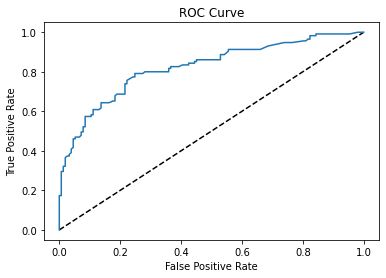

              precision    recall  f1-score   support

           0       0.76      0.85      0.80       153
           1       0.76      0.64      0.70       115

    accuracy                           0.76       268
   macro avg       0.76      0.75      0.75       268
weighted avg       0.76      0.76      0.76       268

K Nearest Neighbours : 0.709
[[123  30]
 [ 48  67]]
ROC AUC score: 0.74


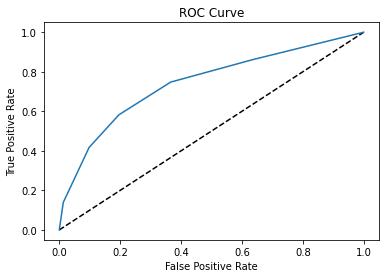

              precision    recall  f1-score   support

           0       0.72      0.80      0.76       153
           1       0.69      0.58      0.63       115

    accuracy                           0.71       268
   macro avg       0.71      0.69      0.70       268
weighted avg       0.71      0.71      0.70       268

Classification Tree : 0.754
[[136  17]
 [ 49  66]]
ROC AUC score: 0.75


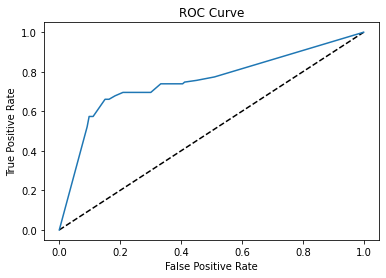

              precision    recall  f1-score   support

           0       0.74      0.89      0.80       153
           1       0.80      0.57      0.67       115

    accuracy                           0.75       268
   macro avg       0.77      0.73      0.74       268
weighted avg       0.76      0.75      0.75       268

Random Forest : 0.772
[[137  16]
 [ 45  70]]
ROC AUC score: 0.81


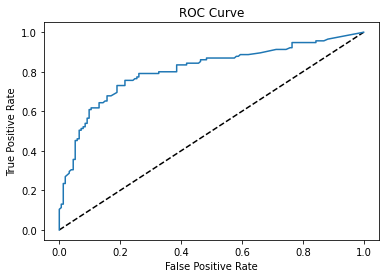

              precision    recall  f1-score   support

           0       0.75      0.90      0.82       153
           1       0.81      0.61      0.70       115

    accuracy                           0.77       268
   macro avg       0.78      0.75      0.76       268
weighted avg       0.78      0.77      0.77       268

Bagging Classifier : 0.780
[[138  15]
 [ 44  71]]
ROC AUC score: 0.81


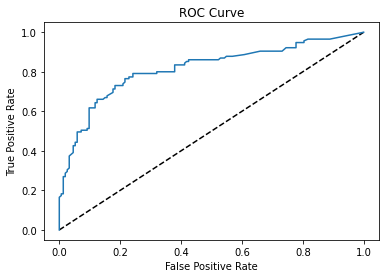

              precision    recall  f1-score   support

           0       0.76      0.90      0.82       153
           1       0.83      0.62      0.71       115

    accuracy                           0.78       268
   macro avg       0.79      0.76      0.77       268
weighted avg       0.79      0.78      0.77       268

Adaboost : 0.750
[[133  20]
 [ 47  68]]
ROC AUC score: 0.76


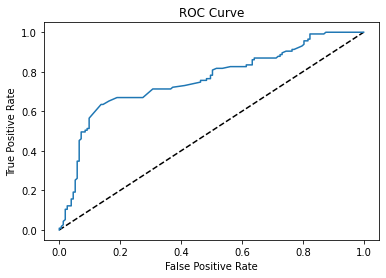

              precision    recall  f1-score   support

           0       0.74      0.87      0.80       153
           1       0.77      0.59      0.67       115

    accuracy                           0.75       268
   macro avg       0.76      0.73      0.73       268
weighted avg       0.75      0.75      0.74       268

Gradient Boosting : 0.769
[[135  18]
 [ 44  71]]
ROC AUC score: 0.82


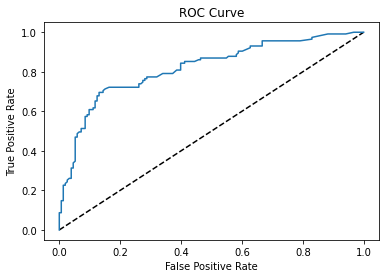

              precision    recall  f1-score   support

           0       0.75      0.88      0.81       153
           1       0.80      0.62      0.70       115

    accuracy                           0.77       268
   macro avg       0.78      0.75      0.75       268
weighted avg       0.77      0.77      0.76       268

Xtreme GB : 0.765
[[143  10]
 [ 53  62]]
ROC AUC score: 0.82


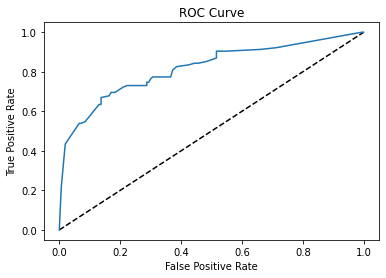

              precision    recall  f1-score   support

           0       0.73      0.93      0.82       153
           1       0.86      0.54      0.66       115

    accuracy                           0.76       268
   macro avg       0.80      0.74      0.74       268
weighted avg       0.79      0.76      0.75       268

OOB accuracy of bagging classifier: 0.804


In [0]:
import warnings
warnings.filterwarnings("ignore")
# Iterate over the defined list of tuples containing the classifiers
for clf_name, clf in classifiers:
  #fit clf to the training set
  clf.fit(X_train, y_train)
  # Predict the labels of the test set
  y_pred = clf.predict(X_test)
  # Evaluate the accuracy of clf on the test set
  print('{:s} : {:.3f}'.format(clf_name, accuracy_score(y_test, y_pred)))
  print(confusion_matrix(y_test,y_pred))
  y_pred_proba = clf.predict_proba(X_test)[:,1]  
  clf_roc_auc_score = roc_auc_score(y_test, y_pred_proba)
  print('ROC AUC score: {:.2f}'.format(clf_roc_auc_score)) 
  fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba) 
  plt.plot([0, 1], [0, 1], 'k--') 
  plt.plot(fpr, tpr, label='Random Forest Classification') 
  plt.xlabel('False Positive Rate') 
  plt.ylabel('True Positive Rate') 
  plt.title('ROC Curve') 
  plt.show();
  print(classification_report(y_test, y_pred))
  print("="*60)
oob_accuracy = bc.oob_score_
print('OOB accuracy of bagging classifier: {:.3f}'.format(oob_accuracy))


In [0]:
# Instantiate a VotingClassifier 'vc' 
vc = VotingClassifier(estimators=classifiers)  
# Fit 'vc' to the traing set and predict test set labels 
vc.fit(X_train, y_train)    
y_pred = vc.predict(X_test) 
# Evaluate the test-set accuracy of 'vc' 
print('Voting Classifier: {:.3f}'.format(accuracy_score(y_test, y_pred)))


Voting Classifier: 0.769


In [0]:
classifiers = [('Logistic Regression', lr),('K Nearest Neighbours', knn),
               ('Classification Tree', dt),('Random Forest',rf),
               ('Bagging Classifier',bc),('Adaboost',adb),('Gradient Boosting',gb)]
lr = LogisticRegression(random_state=SEED)
knn = KNN()
dt = DecisionTreeClassifier(random_state=SEED)
rf = RandomForestClassifier(n_estimators=300,random_state=SEED)
bc = BaggingClassifier(base_estimator=dt, n_estimators=300, n_jobs=-1,random_state=SEED,oob_score=True)
adb = AdaBoostClassifier(base_estimator=dt, n_estimators=100,random_state=SEED) 
gb= GradientBoostingClassifier(n_estimators=300, max_depth=1, random_state=SEED,subsample=0.8,max_features=0.2) 
for clf_name, clf in classifiers:
  scores = cross_val_score(clf, X_train, y_train, cv=10, scoring = "accuracy")
  print('{:s} '.format(clf_name))
  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("Standard Deviation:", scores.std())
  

Logistic Regression 
Scores: [0.74603175 0.76190476 0.80952381 0.82258065 0.88709677 0.83870968
 0.79032258 0.80645161 0.79032258 0.80645161]
Mean: 0.8059395801331284
Standard Deviation: 0.03737172818289197
K Nearest Neighbours 
Scores: [0.79365079 0.76190476 0.76190476 0.77419355 0.82258065 0.66129032
 0.77419355 0.75806452 0.72580645 0.80645161]
Mean: 0.7640040962621607
Standard Deviation: 0.042863565726017516
Classification Tree 
Scores: [0.71428571 0.71428571 0.85714286 0.72580645 0.87096774 0.77419355
 0.83870968 0.77419355 0.79032258 0.72580645]
Mean: 0.7785714285714285
Standard Deviation: 0.05686578060636469
Random Forest 
Scores: [0.76190476 0.74603175 0.85714286 0.74193548 0.87096774 0.80645161
 0.80645161 0.82258065 0.82258065 0.77419355]
Mean: 0.8010240655401943
Standard Deviation: 0.04218475753815971
Bagging Classifier 
Scores: [0.76190476 0.76190476 0.84126984 0.74193548 0.87096774 0.79032258
 0.80645161 0.80645161 0.80645161 0.75806452]
Mean: 0.7945724526369687
Standard D

In [0]:
feature_imp = pd.Series(rf.feature_importances_,index=list(X.columns.values.tolist())).sort_values(ascending=False)
feature_imp

Sex          0.343937
Relatives    0.118021
Fare         0.116232
Age_Class    0.111411
Pclass       0.102768
Age          0.082094
Embarked     0.063900
SibSp        0.061638
dtype: float64

No handles with labels found to put in legend.


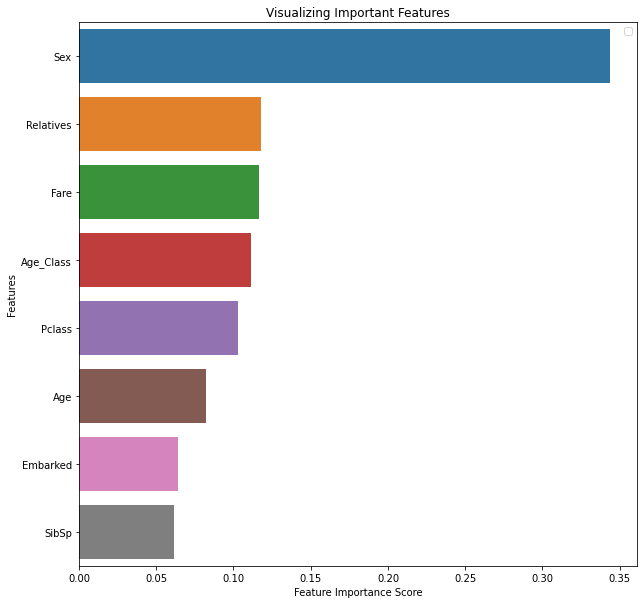

In [0]:
plt.figure(figsize=(10,10))
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [0]:
param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10, 25, 50, 70], 
              "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35],
              "n_estimators": [100, 400, 700, 1000, 1500]}
raf = RandomForestClassifier(random_state=SEED)
clfa = GridSearchCV(estimator=raf, param_grid=param_grid, n_jobs=-1)
clfa.fit(X_train, y_train)
clfa.best_params_

In [0]:
So bagging classifier is the classifer with highest accuracy=78% and oob score=80.4%  among all the classifers and will be used to train our model.